In [1]:
#imports
import katdal
import numpy as np
import matplotlib.pylab as plt
import astropy.coordinates as ac
import functools
import healpy as hp
import optparse
import warnings
from matplotlib.backends.backend_pdf import PdfPages
import healpy as hp
from astropy import units as u
from matplotlib.offsetbox import AnchoredText
import time
import pickle
import sys
import katcali
import katcali.visualizer as kv
import katcali.models as km
import katcali.rfi as kr
import katcali.solver as ks
import katcali.io as kio
import katcali.label_dump as kl
import katcali.diode as kd
import katcali.filter as kf
import katcali.beam as kb
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.sparse import coo_matrix
import astropy.wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.io import fits
from astropy.wcs import WCS
from scipy.interpolate import UnivariateSpline
import matplotlib.colors as colors
Tcmb=2.725
k_B = 1.38E-23

In [2]:
print ('start @ ' + time.asctime(time.localtime(time.time())) +'...')

start @ Mon Jul 29 12:28:10 2024...


In [3]:
#input_file='/idia/projects/hi_im/raw_vis/MeerKLASS2021/self_cal/pix0.3_sigma4_count40/level5/re_cali1_round5/'
input_file='/idia/projects/hi_im/raw_vis/MeerKLASS2021/self_cal/pix0.3_sigma4_count40/level4/re_cali1_round5/'
print (input_file)

input_file2='/idia/projects/hi_im/raw_vis/MeerKLASS2021/self_cal/pix0.3_sigma4_count40/level6/re_cali1_round5/'
print (input_file2)


/idia/projects/hi_im/raw_vis/MeerKLASS2021/self_cal/pix0.3_sigma4_count40/level4/re_cali1_round5/
/idia/projects/hi_im/raw_vis/MeerKLASS2021/self_cal/pix0.3_sigma4_count40/level6/re_cali1_round5/


In [4]:
'''
fname_list=['1630519596','1631379874','1631387336','1631552188','1631559762','1631659886',
            '1631667564','1631724508','1631732038','1631810671','1631818149','1631982988',
            '1631990463','1632069690','1632077222','1632184922','1632505883','1632760885',
            '1633365980','1633970780','1634252028','1634402485','1634748682','1634835083',
            '1637346562','1637354605','1637691677','1637699408','1638130295','1638294319',
            '1638301944','1638386189','1638639082','1638647186','1638898468','1639157507',
            '1639331184','1639935088','1640540184','1640712986','1640799689']
'''

fname_list=['1630519596', '1631387336', '1631559762', '1631667564', '1631732038', '1631810671', 
            '1631818149', '1631982988', '1631990463', '1632069690', '1632077222', '1632184922', 
            '1632760885', '1633365980', '1634252028', '1634402485', '1637346562', '1637354605',
            '1637691677', '1637699408', '1638130295', '1638294319', '1638301944', '1638386189', 
            '1638639082', '1639157507', '1640799689']

#fname_list=['1639157507']

In [5]:
total_count_MAX=961
good_count=0


In [6]:
empty_array=np.zeros([len(fname_list),64])
good_ant_ch_array=empty_array.copy()
good_ant_ch_array2=empty_array.copy()

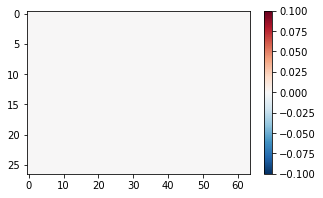

In [7]:
plt.figure(figsize=(5,3))
plt.imshow(empty_array,aspect='auto',cmap=kv.cmap2())
plt.colorbar()
plt.show()

In [8]:
ratio_lim=0.5

In [9]:
for a_i in range(64):
    ant='m'+ "%03d" % a_i

    for f_i in range(len(fname_list)):
        fname=fname_list[f_i]
        try:
            
            #Fits2=input_file+fname+'_'+ant+'_Tresi_xy_p0.3d.fits'
            #Tresi_cube = fits.open(Fits2)[0].data
            d4=pickle.load(open(input_file+fname+'_'+ant+'_level4_data', 'rb'))
            Tresi_map=d4['Tresi_map']
            nd_s0_h=d4['nd_s0_h']
                        
            d = pickle.load(open(input_file2+fname+'_'+ant+'_level6_p0.3d_sigma4.0_iter2_mask', 'rb'))
            mask=d['ch_mask']
            
            #if (np.isnan(Tresi_cube)).all()==False:
            if (Tresi_map.mask==True).all()==False:    
                good_count+=1
                print (good_count, end=' ')
                
                for ch_i in list(range(550,1051)):# + list(range(2150,3101)):
                    #if (np.isnan(Tresi_cube[:,:,ch_i])).all()==False:
                    a=np.where(Tresi_map[:,ch_i].mask==False)[0]
                    #print (a)
                    local_ratio=len(a)/len(nd_s0_h)
                    #print (len(a),len(nd_s0_h),local_ratio)
                    ######
                    if good_count==1 and ch_i==800:
                        print (np.shape(Tresi_map))
                        print (np.shape(nd_s0_h))
                        print (np.shape(a))
                    ######
                    #if ((Tresi_cube[:,:,ch_i])).all()==False:    
                    if local_ratio>ratio_lim: 
                        good_ant_ch_array[f_i,a_i]+=1
                        if mask[ch_i]==False:
                            good_ant_ch_array2[f_i,a_i]+=1
                
            else:
                print ('')
                print ('*** '+fname+', '+ant+' need to be deleted')

        except IOError:
            pass

1 (3647, 4096)
(2552,)
(2037,)
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270

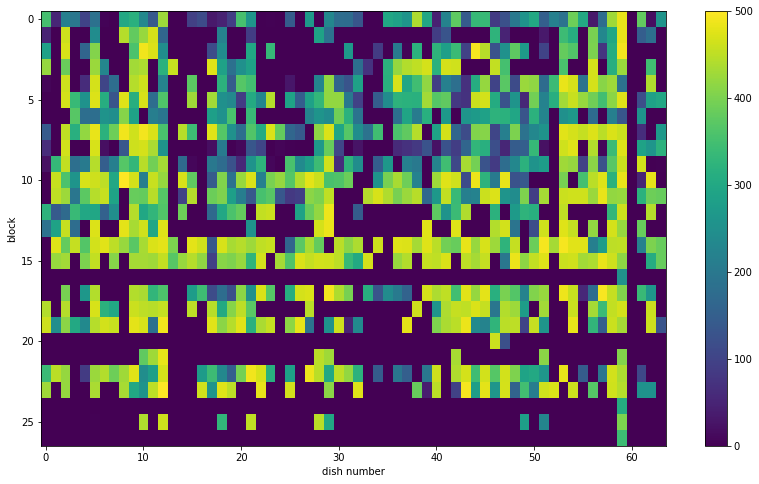

In [10]:
plt.figure(figsize=(14,8))
plt.imshow(good_ant_ch_array,aspect='auto',cmap=kv.cmap1())
plt.colorbar()
plt.xlabel('dish number')
plt.ylabel('block')
plt.show()

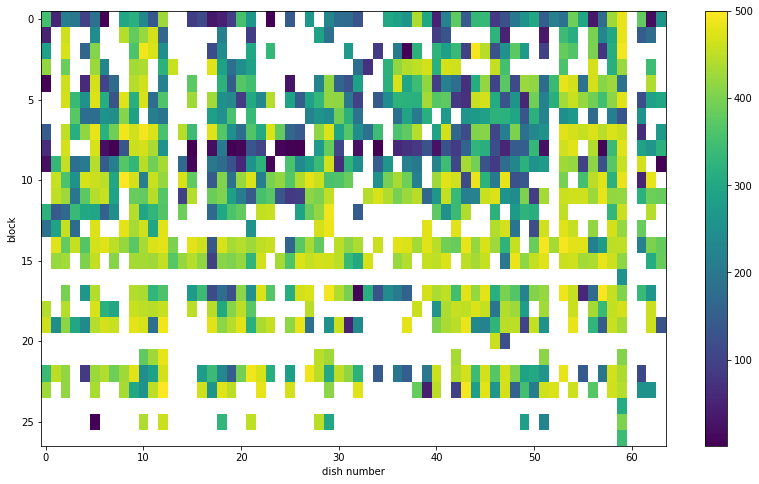

In [11]:
array1=np.ma.array(good_ant_ch_array,mask=False)
array1.mask[array1==0]=True

plt.figure(figsize=(14,8))
plt.imshow(array1,aspect='auto',cmap=kv.cmap1())
plt.colorbar()
plt.xlabel('dish number')
plt.ylabel('block')
plt.show()

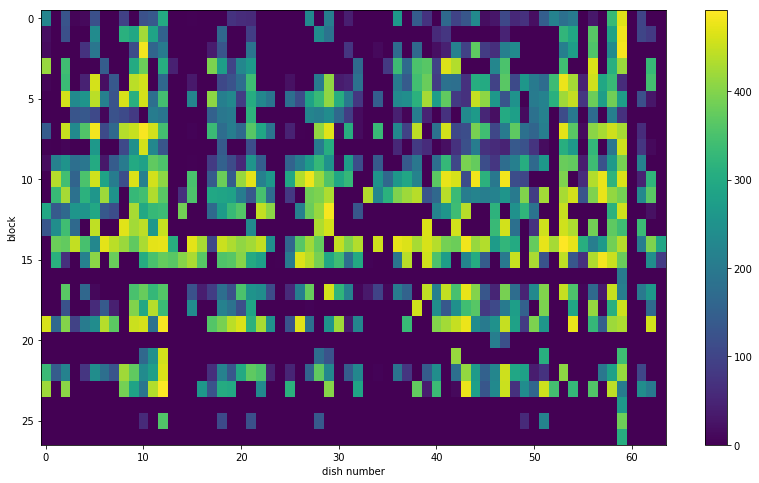

In [12]:
plt.figure(figsize=(14,8))
plt.imshow(good_ant_ch_array2,aspect='auto',cmap=kv.cmap1())
plt.colorbar()
plt.xlabel('dish number')
plt.ylabel('block')
plt.show()

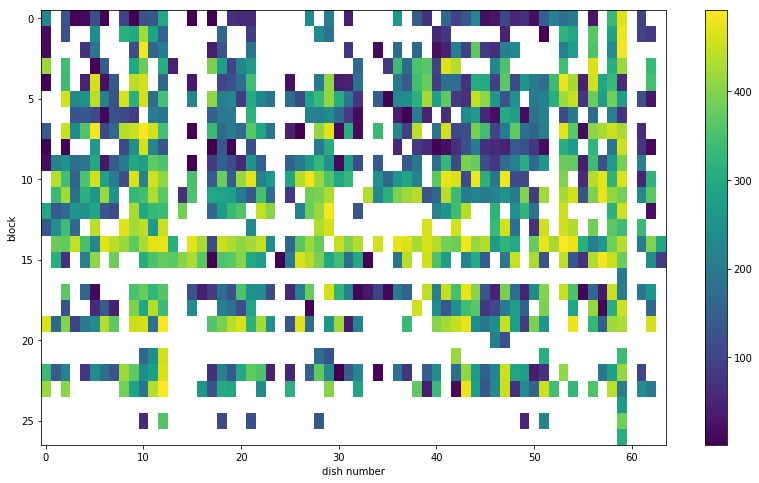

In [13]:
array2=np.ma.array(good_ant_ch_array2,mask=False)
array2.mask[array2==0]=True

plt.figure(figsize=(14,8))
plt.imshow(array2,aspect='auto',cmap=kv.cmap1())
plt.colorbar()
plt.xlabel('dish number')
plt.ylabel('block')
plt.show()

In [14]:
np.shape(array2)

(27, 64)

In [15]:
print (len(fname_list))

27


In [16]:
fname_list_clean=set(fname_list)
print (len(fname_list_clean))

27


In [17]:
block_drop_count=0
for i in range(np.shape(array2)[0]):
    if (array2[i,:].mask==True).all():
        print (fname_list[i])
        fname_list_clean.remove(fname_list[i])
        block_drop_count+=1

In [18]:
fname_list_clean=list(fname_list_clean)
fname_list_clean.sort()
print (len(fname_list_clean))
print (fname_list_clean)

27
['1630519596', '1631387336', '1631559762', '1631667564', '1631732038', '1631810671', '1631818149', '1631982988', '1631990463', '1632069690', '1632077222', '1632184922', '1632760885', '1633365980', '1634252028', '1634402485', '1637346562', '1637354605', '1637691677', '1637699408', '1638130295', '1638294319', '1638301944', '1638386189', '1638639082', '1639157507', '1640799689']


In [19]:
lost_percent=int((1-ratio_lim)*100)
print (lost_percent,'%')

50 %


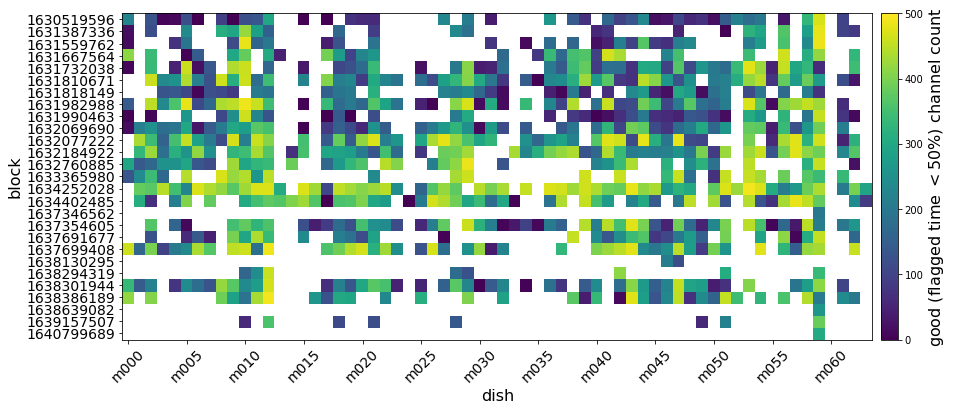

In [20]:
plt.figure(figsize=(16,6))
plt.imshow(array2,aspect='auto',cmap=kv.cmap1(),vmin=0,vmax=500)
cb=plt.colorbar(pad=0.01)
cb.set_label(label='good (flagged time $<'+str(lost_percent)+'\%$) channel count', fontsize=16)
plt.xlabel('dish',fontsize=16)
plt.ylabel('block',fontsize=16)
plt.yticks(np.arange(0,27,1),fname_list_clean,fontsize=14)
plt.xticks(np.arange(0,64,5),['m000','m005','m010','m015','m020','m025','m030','m035','m040','m045','m050','m055','m060'],fontsize=14, rotation=45)
plt.savefig('FF_block_ant_good_channel_number_L'+str(lost_percent)+'.pdf', bbox_inches='tight')
plt.show()

In [21]:
print ('end @ ' + time.asctime(time.localtime(time.time())) +'#')

end @ Mon Jul 29 13:09:43 2024#
